# **Đề tài: Phân tích xem thu nhập của người dân có trên 50K hay không ?**

### Thành viên thực hiện :
| MSSV     | Họ và Tên       | Công việc                                                         | Hoàn thành |
| :-----   | :----------     | :-----------------------------------------------------------------| :----------|
| 20133119 | Lê Phước Yên    | Sử dụng Python thực hiện trực quan hoá các thuộc tính, tổng hợp   | 100%       |
| 20133020 | Nguyễn Duy Thái | Xây dựng mô hình dự đoán, kết luận                                | 100%       |
| 20133095 | Phan Thanh Tín  | Lên ý tưởng, sử dụng Python thực hiện trực quan hoá các thuộc tính| 100%       |
| 20133074 | Võ Hữu Nghĩa    | Sử dụng PowerBI để trực quan hoá các thuộc tính, kết luận         | 100%       |

> ## 1. Giới thiệu về tập dữ liệu:
Tập dữ liệu "Adult Census Income" trên Kaggle được thu thập từ Bộ Tư pháp Hoa Kỳ và Bộ Thống kê Hoa Kỳ. Tập dữ liệu bao gồm thông tin về hộ gia đình, tuổi, giới tính, trình độ học vấn, nghề nghiệp, số giờ làm việc hàng tuần, tình trạng hôn nhân, chủng tộc và thu nhập hàng năm được phân loại thành 2 nhóm: "thấp hơn hoặc bằng 50K" và "trên 50K".

Tập dữ liệu này có 32561 mẫu và 15 thuộc tính, bao gồm 6 thuộc tính liên tục và 9 thuộc tính rời rạc. Tập dữ liệu này được sử dụng rộng rãi trong cộng đồng học máy và là một trong những tập dữ liệu phân loại phổ biến nhất.

Nguồn thu thập dữ liệu: https://www.kaggle.com/datasets/uciml/adult-census-income

Tiến hành import 1 số thư viện để tiện cho việc trực quan hoá và phân tích.

In [75]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = pd.read_csv("adult.csv",na_values=['?'])
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


> ## 2. Tiền xử lý dữ liệu: 

In [77]:
data.shape

(32561, 15)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [79]:
data.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [80]:
# Xem tỉ lệ giá trị NaN
data.isnull().sum()/data.shape[0]*100

age               0.000000
workclass         5.638647
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        5.660146
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    1.790486
income            0.000000
dtype: float64

In [81]:
# Thực hiện xoá các hàng giá trị NaN ra khỏi tập dữ liệu
data.dropna(axis=0, inplace=True)

In [82]:
# Tính toán các thống kê cơ bản của các cột trong DataFrame, bao gồm số lượng, trung bình, độ lệch chuẩn, giá trị tối thiểu, các phân vị và giá trị tối đa.
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


> ## 3. Data Visulization:
Thực hiện việc vẽ 1 số biểu đồ để có cái nhìn tổng quát về tập dữ liệu

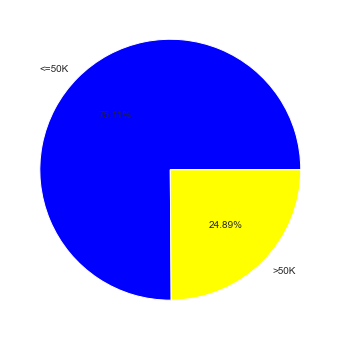

<=50K    75.107751
>50K     24.892249
Name: income, dtype: float64


In [83]:
income_counts = data['income'].value_counts()
income_percents = income_counts / income_counts.sum() * 100
# Vẽ biểu đồ phần trăm
plt.figure(figsize=(6,6))
plt.pie(income_percents, labels=income_percents.index,colors= ['blue', 'yellow'], autopct='%1.2f%%')
# Hiển thị biểu đồ
plt.show()
print(income_percents)

Biểu đồ Histogram các cột dữ liệu số

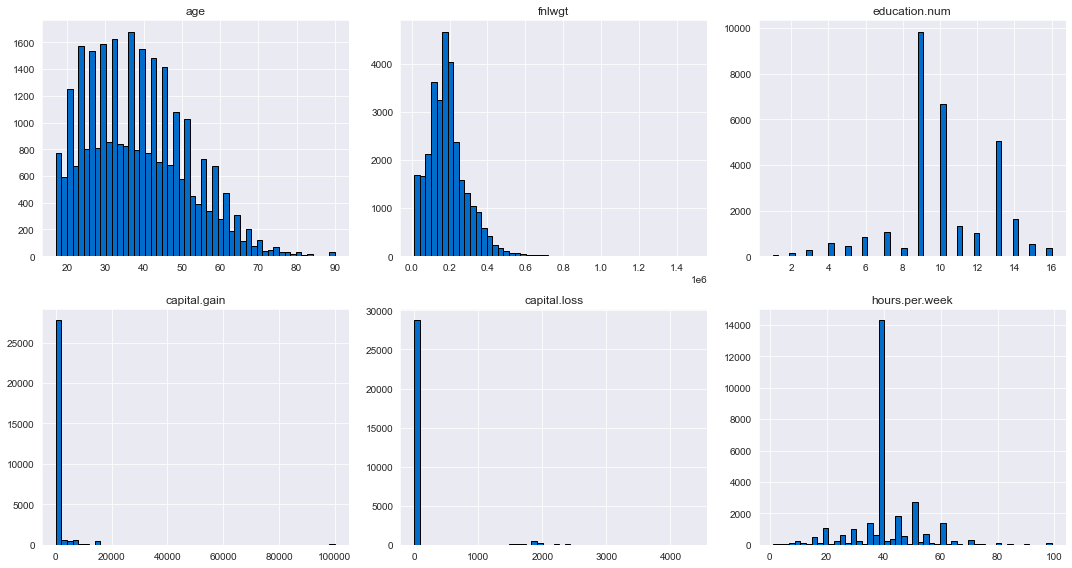

In [84]:
figsize_val=(15,8)
layout_val=(-1, 3)
data.hist(bins=50, figsize=figsize_val, layout=layout_val, edgecolor="black",color='#016CC9')
plt.tight_layout();

Biểu đồ scatter plot cho các cột dữ liệu số để thể hiện sự phân bố dữ liệu:

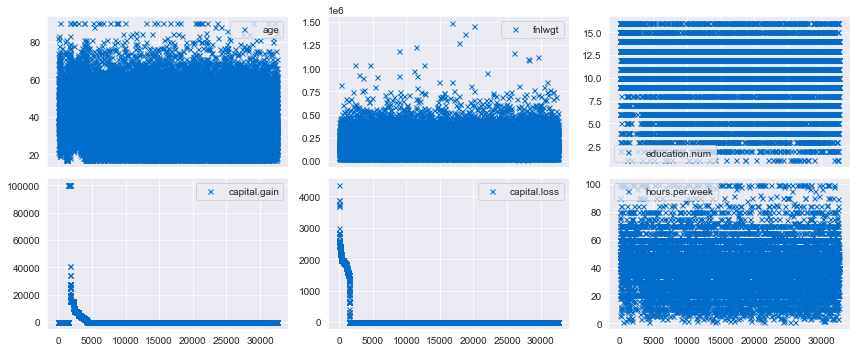

In [85]:
# For all Numerical columnn for all rows 
data.plot(lw=0, marker="x", subplots=True, layout=(-1, 3),
          figsize=(12,5), markersize=5,color='#016CC9')
plt.tight_layout()

### Giới tính

In [86]:
import plotly.express as px
df = data[['age', 'sex']]

# Tính số lượng observations cho từng giá trị age và income
count_by_age_income = df.groupby(['age', 'sex']).size().reset_index(name='counts')

# Vẽ biểu đồ tháp dân số bằng plotly
fig = px.bar(count_by_age_income, x='age', y='counts', color='sex', barmode='stack')
fig.show()

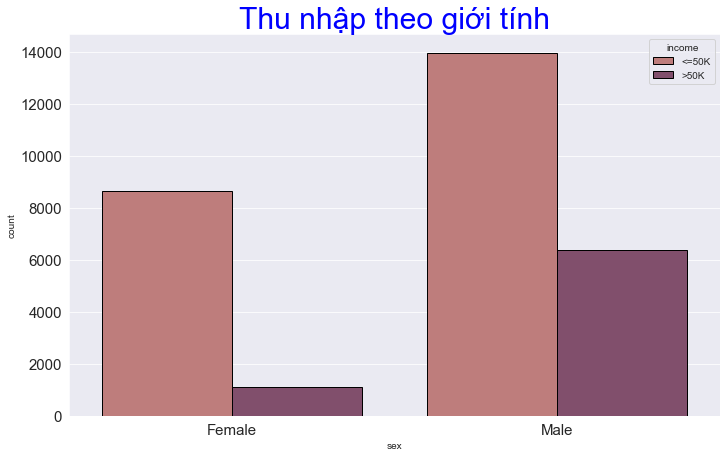

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['sex'],hue=data['income'],palette='flare',saturation=0.5,edgecolor="black")
plt.tight_layout()
plt.title('Thu nhập theo giới tính', fontsize =30, color = 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

Tỷ lệ nam giới kiếm được hơn 50.000 đô la lớn hơn nhiều so với tỷ lệ nữ giới kiếm được cùng số tiền.

In [88]:
data_1 = data.loc[data['income']=='>50K']
data_2 = data.loc[data['income']=='<=50K']
prenc= data_1.groupby('sex')['income'].count()
prenc_1 = prenc / (data_1['sex'].value_counts()) * 100  
prenc_1


Female    100.0
Male      100.0
dtype: float64

In [89]:
flights = pd.pivot_table(data, index='occupation', columns='native.country', values='hours.per.week')
flights

native.country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
occupation,,,,,,,,,,,,,,,,,,,,,
Adm-clerical,NaN,36.750000,40.000000,37.750000,37.000000,40.000000,40.000000,30.000000,36.285714,40.0,...,37.500000,33.470588,35.000000,38.750000,40.000000,25.000000,34.750000,37.605683,36.058824,40.0
Armed-Forces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.666667,NaN,NaN
Craft-repair,40.833333,42.000000,40.666667,41.111111,40.000000,39.166667,46.250000,40.333333,44.375000,NaN,...,42.500000,39.500000,NaN,50.750000,38.500000,40.000000,40.000000,42.376119,36.416667,53.0
Exec-managerial,40.000000,48.769231,42.500000,40.000000,45.000000,37.500000,50.000000,47.500000,44.350000,50.0,...,38.000000,43.000000,48.333333,47.384615,50.090909,62.000000,40.000000,44.902811,53.333333,46.4
Farming-fishing,40.000000,55.000000,NaN,NaN,40.000000,NaN,NaN,35.000000,40.000000,25.0,...,84.000000,48.000000,NaN,NaN,NaN,NaN,NaN,47.478953,40.000000,65.0
Handlers-cleaners,NaN,45.000000,NaN,40.000000,32.000000,49.600000,30.000000,34.285714,40.000000,NaN,...,40.000000,38.750000,NaN,50.000000,NaN,NaN,NaN,37.669470,40.000000,NaN
Machine-op-inspct,40.000000,39.200000,41.000000,38.000000,40.666667,41.909091,40.875000,39.666667,40.000000,NaN,...,40.166667,41.562500,40.000000,40.000000,NaN,80.000000,27.000000,40.836396,40.000000,30.0
Other-service,42.000000,31.083333,38.125000,35.000000,37.538462,39.750000,38.666667,36.750000,36.142857,31.0,...,42.500000,36.125000,30.000000,42.272727,2.000000,47.000000,31.333333,33.976233,33.333333,42.5
Priv-house-serv,NaN,NaN,NaN,40.000000,21.000000,40.000000,28.000000,35.333333,53.333333,40.0,...,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,31.000000,NaN,NaN


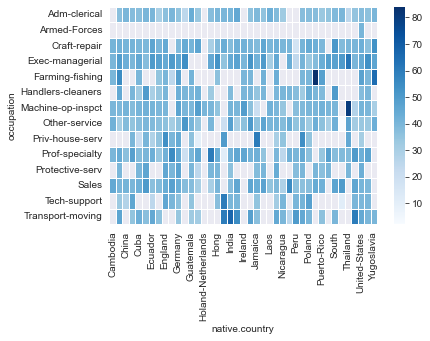

In [90]:

sns.heatmap(data=flights, cmap='Blues', linecolor='white', linewidths=1);

### Age

age                  
            mean median        std
income                            
<=50K   36.60806   34.0  13.464631
>50K    43.95911   43.0  10.269633

<AxesSubplot:xlabel='age', ylabel='count'>

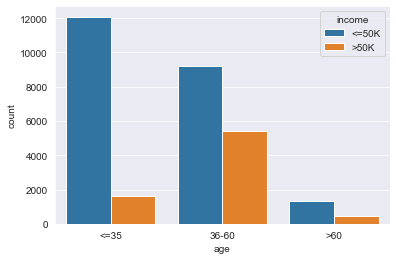

In [91]:
# display(datadanso.groupby('income').agg({'age':['mean','median','std']}))
# ax = sns.boxplot(x= 'income', y= 'age', data= datadanso)
display(data.groupby('income').agg({'age':['mean','median','std']}))
age_lables= ["<=35","36-60",">60"]
age_bins = [0, 35, 60, 100]
age_group = pd.cut(data["age"], age_bins, labels= age_lables)
sns.countplot(data= data, x= age_group, hue='income')

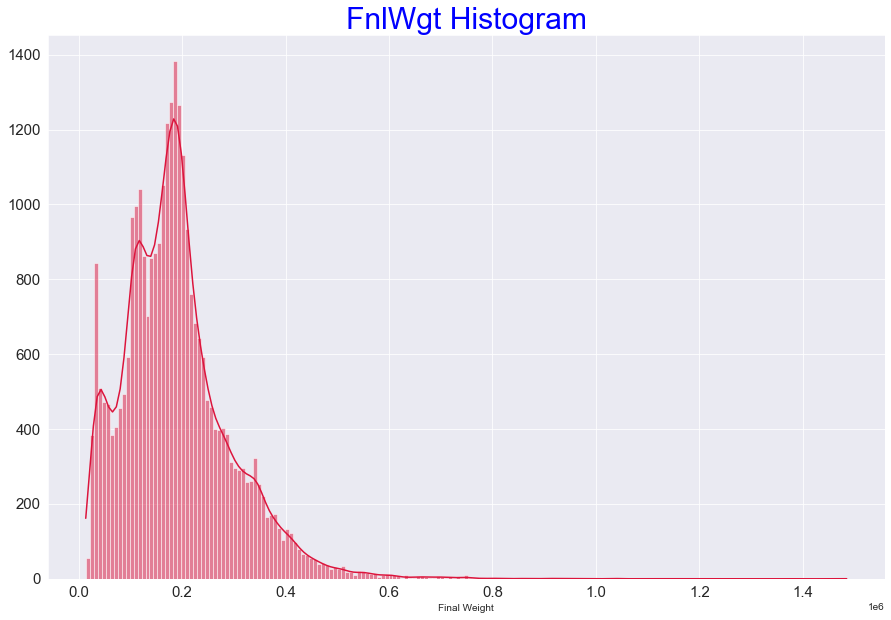

count    3.016200e+04
mean     1.897938e+05
std      1.056530e+05
min      1.376900e+04
25%      1.176272e+05
50%      1.784250e+05
75%      2.376285e+05
85%      2.894411e+05
90%      3.290026e+05
100%     1.484705e+06
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [92]:
fig = plt.figure(figsize=(15, 10))
sns.set_style('darkgrid')
sns.histplot(data=data,x='fnlwgt', kde= True,linewidth=0.5, color='crimson')
plt.title('FnlWgt Histogram', fontsize =30, color = 'blue')
plt.xlabel('Final Weight')
plt.ylabel('')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
data['fnlwgt'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

### Work class

In [93]:
data['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay'], dtype=object)

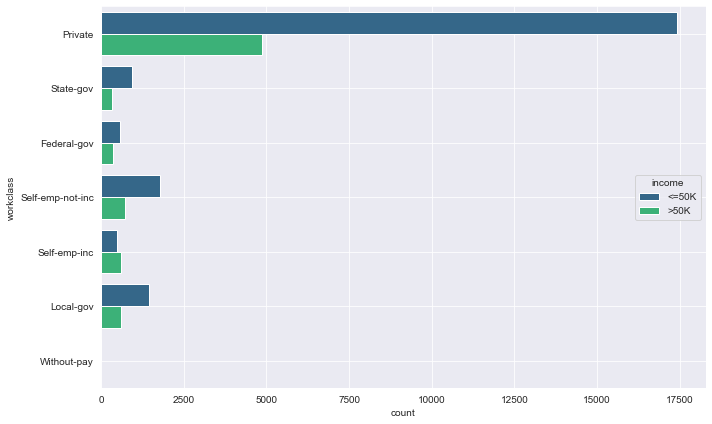

In [94]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['workclass'],hue=data['income'],palette='viridis',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.show()

Phần lớn các cá nhân làm việc trong khu vực tư nhân. Xác suất thu nhập trên 50K là tương tự giữa các tầng lớp lao động ngoại trừ self-emp-inc và federal. Federal (Chính phủ liên bang) được coi là ưu tú nhất trong khu vực công, điều này rất có thể giải thích cơ hội kiếm được thu nhập hơn 5oK cao hơn.

### Trình trạng hôn nhân

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Widowed'),
  Text(0, 1, 'Divorced'),
  Text(0, 2, 'Separated'),
  Text(0, 3, 'Never-married'),
  Text(0, 4, 'Married-civ-spouse'),
  Text(0, 5, 'Married-spouse-absent'),
  Text(0, 6, 'Married-AF-spouse')])

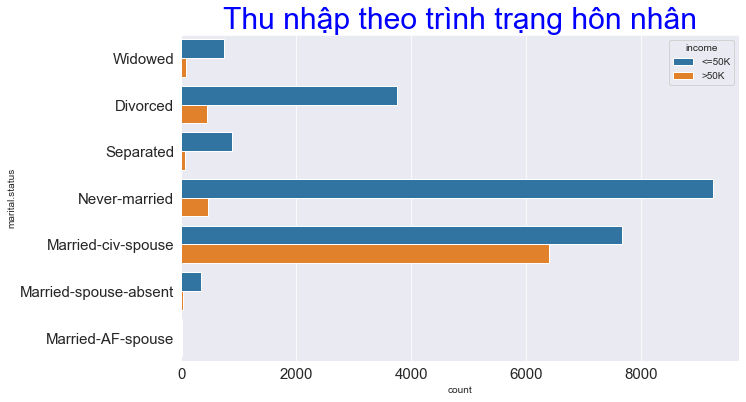

In [95]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['marital.status'],hue=data['income'])
plt.title('Thu nhập theo trình trạng hôn nhân', fontsize =30, color = 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

Trong lớp Married-civ-spouse có tỷ lệ phần trăm thu nhập với mức lương hơn 50 nghìn cao. Chúng ta có thể biến đổi biến này thành kết hôn và không kết hôn. 

In [96]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [97]:
def married(val):
    if val=='Never-married':
        return 'not-married'
    elif val=='Divorced':
        return 'not-married'
    elif val=='Separated':
        return 'not-married'
    elif val==' Widowed':
        return 'not-married'
    else:
        return 'married'

In [98]:
data['marital.status']=data['marital.status'].apply(married)
data['marital.status'].unique()

array(['married', 'not-married'], dtype=object)

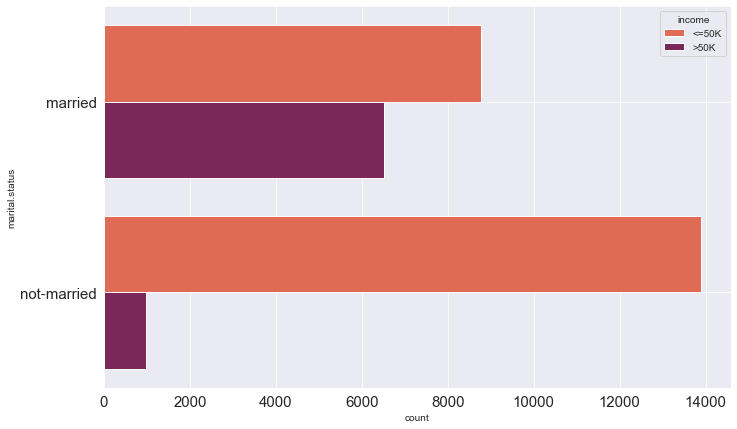

In [99]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['marital.status'],hue=data['income'],palette='rocket_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Now we can see that if a person is married then the proportion of having salary more than 50k is high, and if they are unmarried then proportion of having salary more than 50k is low.

### Nghề nghiệp

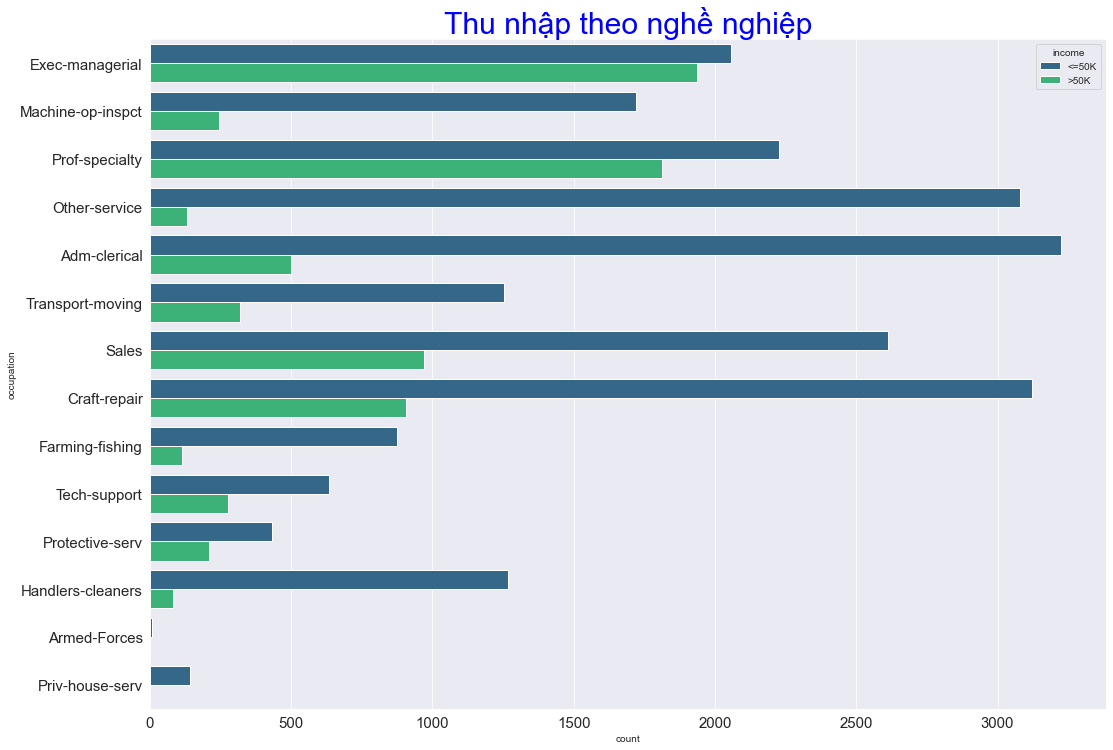

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(y=data['occupation'],hue=data['income'],palette='viridis',saturation=0.9)
plt.tight_layout()
plt.title('Thu nhập theo nghề nghiệp', fontsize =30, color = 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Nhìn vào Nghề nghiệp so với Thu nhập, chuyên môn điều hành và giáo sư (exec­managerial and prof-specialty) nổi bật vì có tỷ lệ cá nhân kiếm được trên 50.000 rất cao. 
Ngoài ra, tỷ lệ phần trăm số người có thu nhập lớn hơn 50K cho Farming Fishing, Other Service và Handlers cleaners thấp hơn đáng kể so với phần còn lại của phân phối.

### Relationship

In [101]:
data['relationship'].unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

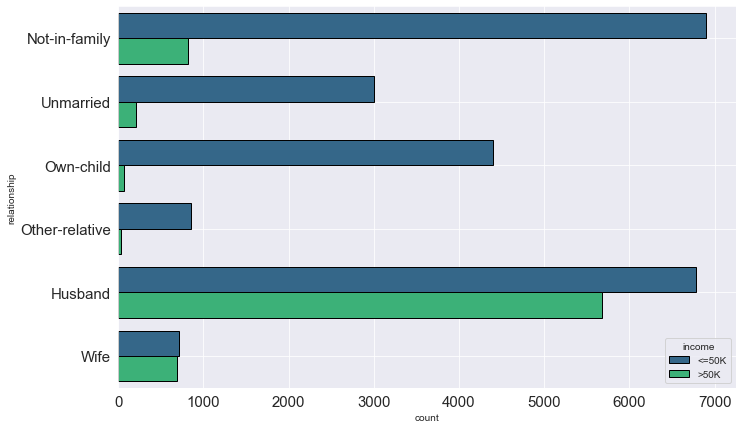

In [102]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['relationship'],hue=data['income'],palette='viridis',saturation=0.9,edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Hours per week

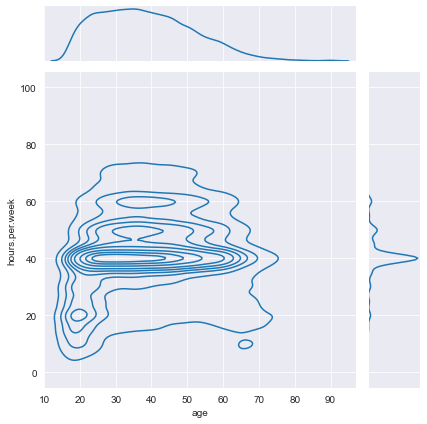

In [103]:
sns.jointplot(x=data['age'],y= data['hours.per.week'], kind='kde')

ax = plt.gca()
ax.spines['top'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)

In [104]:
data_a = data.groupby('age')['hours.per.week'].mean().reset_index()
data_a

,age,hours.per.week
0,17,20.378049
1,18,25.167785
2,19,30.353535
3,20,32.381558
4,21,34.183575
...,...,...
67,84,25.875000
68,85,29.333333
69,86,40.000000
70,88,40.000000


In [105]:
import plotly.express as px


fig = px.line(data_a, x='age', y="hours.per.week" , color_discrete_sequence=['#FF69B4', '#1E90FF'])
fig.show()

In [106]:
fig = px.box(data, x='income', y='hours.per.week', points="all")
fig.show()


Chúng ta có thể thấy rằng số giờ làm việc mỗi tuần phần lớn các giá trị là 40 giờ. Vậy chúng ta có thể tạo 3 lớp là <40 giờ, 40 giờ và >40 giờ và kiểm tra xem với những mốc hơn kém 40 giờ thì thu nhập sẽ như thế nào


In [107]:
def hrs_edit(val):
    if (val<40):
        return ('<40 hrs')
    elif (val==40):
        return ('40 hrs')
    else:
        return ('>40hrs') 

In [108]:
data['hours.per.week']=data['hours.per.week'].apply(hrs_edit)


In [109]:
data['hours.per.week'].unique()

array(['<40 hrs', '40 hrs', '>40hrs'], dtype=object)

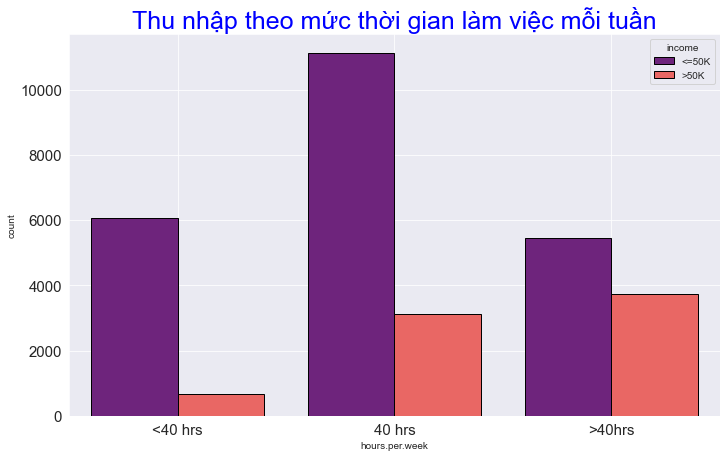

In [110]:
plt.figure(figsize=(10,6))
sns.countplot(x=data['hours.per.week'],hue=data['income'],palette='magma',
              saturation=0.9,edgecolor="black",order=['<40 hrs','40 hrs','>40hrs'])
plt.tight_layout()
plt.grid(True)
plt.title('Thu nhập theo mức thời gian làm việc mỗi tuần', fontsize =25, color = 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Tỷ lệ phần trăm các cá nhân kiếm được trên 50.000 giảm đáng kể khi làm ít hơn 40 giờ mỗi tuần và tăng đáng kể khi làm nhiều hơn 40 giờ mỗi tuần

### Education

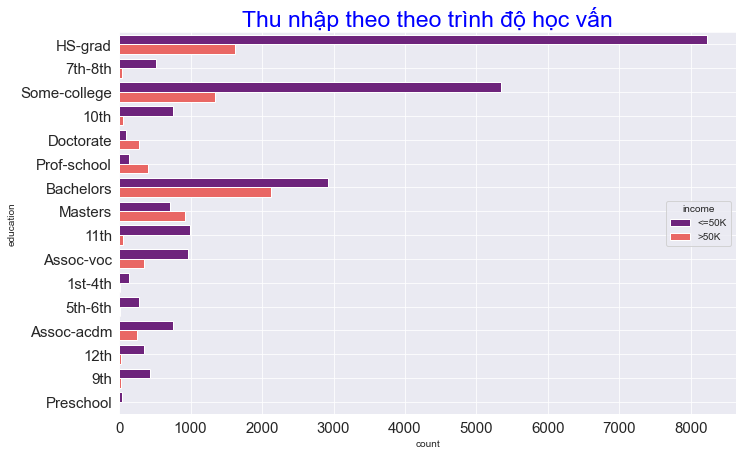

In [111]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['education'],hue=data['income'],palette='magma',saturation=0.9)
plt.tight_layout()
plt.grid(True)
plt.title('Thu nhập theo theo trình độ học vấn', fontsize =23, color = 'blue')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

xếp nhóm Mầm non đến lớp 12 vào 'Student', vì chúng đang mô tả cùng một mẫu và số lượng ít hơn.

In [112]:
data['education'].unique()

array(['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc',
       '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool'],
      dtype=object)

In [113]:
def edu_edit(val):
    
    if (val=='Preschool'):
        return 'Student'
    elif (val=='1st-4th'):
        return 'Student'
    elif (val=='5th-6th'):
        return 'Student'
    elif (val=='7th-8th'):
        return 'Student'
    elif (val=='9th'):
        return 'Student'
    elif (val=='10th'):
        return 'Student'
    elif (val=='11th'):
        return 'Student'
    elif (val=='12th'):
        return 'Student'
    else:
        return val

In [114]:
data['education']=data['education'].apply(edu_edit)


In [115]:
data['education'].unique()

array(['HS-grad', 'Student', 'Some-college', 'Doctorate', 'Prof-school',
       'Bachelors', 'Masters', 'Assoc-voc', 'Assoc-acdm'], dtype=object)

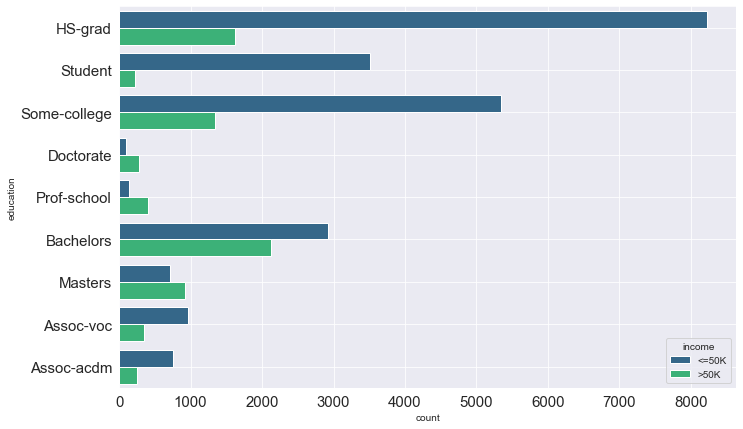

In [116]:
plt.figure(figsize=(10,6))
sns.countplot(y=data['education'],hue=data['income'],palette='viridis',saturation=0.9,alpha =1)
plt.tight_layout()
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Hầu hết các cá nhân trong tập dữ liệu đều có trình độ học vấn học sinh, sinh viên trong khi chỉ một phần nhỏ có bằng tiến sĩ. Phần lớn, trình độ học vấn cao hơn có tương quan với tỷ lệ phần trăm cá nhân có thu nhập >50k cao hơn.

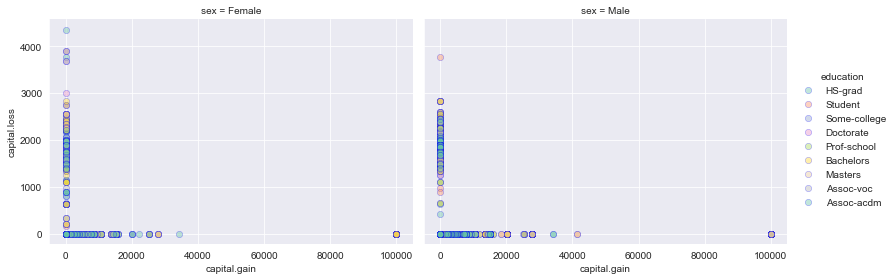

In [117]:
kws= dict(s=40, edgecolor='b', alpha=0.4)
new_fg = sns.FacetGrid(data=data, col="sex",
                       hue="education",
                       col_order=["Female", "Male"],
                       palette='Set2',
                       height=4, aspect=1.4,
                       legend_out=True)

new_fg.map(sns.scatterplot, 'capital.gain', 'capital.loss', **kws)

new_fg.add_legend();

> ## 4. Modeling:

In [118]:
data_Model = pd.read_csv('adult.csv',)
data_Model.replace('?',pd.NA,inplace=True)

In [119]:
data_Model = data_Model.rename(columns={
                     'education.num': 'education_num', 'capital.gain': 'capital_gain', 'capital.loss': 'capital_loss', 'hours.per.week': 'hours_per_week', 'native.country': 'native_country', 'marital.status': 'marital_status'})
data_Model = data_Model.dropna()

In [120]:
data_Model.drop(['fnlwgt'],axis=1,inplace = True)
data_Model.drop(['education'], axis=1, inplace=True)

In [121]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_Model['workclass'] = le.fit_transform(data_Model['workclass'])
data_Model['marital_status'] = le.fit_transform(data_Model['marital_status'])
data_Model['occupation'] = le.fit_transform(data_Model['occupation'])
data_Model['relationship'] = le.fit_transform(data_Model['relationship'])
data_Model['race'] = le.fit_transform(data_Model['race'])
data_Model['sex'] = le.fit_transform(data_Model['sex'])
data_Model['native_country'] = le.fit_transform(data_Model['native_country'])
data_Model['income'] = le.fit_transform(data_Model['income'])

data_Model.head(10)

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
1,82,2,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,6,5,0,4,4,1,0,3770,40,38,0
7,74,5,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,9,0,9,1,4,0,0,3683,40,38,0
10,45,2,16,0,9,4,2,0,0,3004,35,38,1
11,38,4,15,4,9,1,4,1,0,2824,45,38,1
12,52,2,13,6,7,1,4,0,0,2824,20,38,1


In [122]:
data_Model['sex'].unique()

array([0, 1])

In [123]:
data['sex'].unique()

array(['Female', 'Male'], dtype=object)

### Prepare Modelling

In [124]:
y = data_Model.income.copy()
x = data_Model.drop(['income'],axis=1)

In [125]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=7)


In [126]:
y_train.value_counts()

0    18116
1     6013
Name: income, dtype: int64

In [127]:
y_test.value_counts()

0    4538
1    1495
Name: income, dtype: int64

### Model training

In [128]:
from sklearn.linear_model import LogisticRegression

#Tạo ra đối tượng của lớp LogisticRegression
model = LogisticRegression()

In [129]:
model.fit(x_train,y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [130]:
acc = model.score(x_test,y_test)
print("Accuracy",acc)

Accuracy 0.8044090833747721


In [131]:
import numpy as np
from sklearn.model_selection import GridSearchCV

# Định nghĩa một lưới tham số, các giá trị C và solver được sử dụng để tạo ra một tập hợp các cặp tham số khác nhau để đánh giá hiệu suất mô hình trên tập kiểm tra
log_reg_grid = {
    'C': np.logspace(-2,2,20),
    'solver':['liblinear']
}

grid = GridSearchCV(LogisticRegression(), log_reg_grid, cv=5,verbose = True)

grid.fit(x_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 1.62377674e-02, 2.63665090e-02, 4.28133240e-02,
       6.95192796e-02, 1.12883789e-01, 1.83298071e-01, 2.97635144e-01,
       4.83293024e-01, 7.84759970e-01, 1.27427499e+00, 2.06913808e+00,
       3.35981829e+00, 5.45559478e+00, 8.85866790e+00, 1.43844989e+01,
       2.33572147e+01, 3.79269019e+01, 6.15848211e+01, 1.00000000e+02]),
                         'solver': ['liblinear']},
             verbose=True)

In [132]:
#Tìm ra tham số tốt nhất cho mô hình
grid.best_params_

{'C': 100.0, 'solver': 'liblinear'}

In [133]:
print("Accuracy",grid.score(x_test,y_test))

Accuracy 0.8236366650091165


In [134]:
from sklearn.metrics import classification_report

y_predict = grid.predict(x_test)
#print("preds", y_pred[:5])
rep = classification_report(y_test, y_predict)
print(rep)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4538
           1       0.74      0.44      0.55      1495

    accuracy                           0.82      6033
   macro avg       0.79      0.70      0.72      6033
weighted avg       0.81      0.82      0.81      6033



In [135]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
df_cm = pd.DataFrame(cm, columns=['Predict <50K', 'Predict >50K'], index= ['Actual < 50K','Actual > 50K'])
print(df_cm)

              Predict <50K  Predict >50K
Actual < 50K          4309           229
Actual > 50K           835           660


## Nhận xét
- Tỉ lệ dự đoán đúng (precision) người có thu nhập dưới 50K/năm : 84%, recall : 95%
- Tỉ lệ dự đoán đúng (precision) người có thu nhập trên 50k/năm : 74%, recall: 44% , tỉ lệ bỏ sót cao những người có thu nhập trên 50K/năm  
 => Mô hình phân loại rất tốt những người có thu nhập dưới 50K/năm, nhưng mô hình chưa tốt trong việc phân loại người đó có thu nhập trên mức 50K/năm


### Feature importance

In [136]:
# Lựa chọn ra các thuộc tính quan trọng có ảnh hưởng đến kết quả dự đoán
grid = LogisticRegression(C=100.0,solver='liblinear')
grid.fit(x_train,y_train)


LogisticRegression(C=100.0, solver='liblinear')

In [137]:
# Các hệ số tương ứng với các biến đầu vào  
grid.coef_

array([[ 3.38748038e-02, -1.53025907e-01,  3.18672471e-01,
        -1.92681669e-01, -3.22830656e-03, -1.56771770e-01,
         1.05680227e-01,  7.82798683e-01,  3.15433544e-04,
         6.76874817e-04,  2.67786581e-02, -3.12569677e-03]])

In [138]:
# Tạo ra 1 dictionary gồm các tt của bộ dữ liệu adult và giá trị hệ số t/ư của mô hình hồi qui được huấn luyện bằng grid search
feature_dict = dict(zip(data_Model.columns,list(grid.coef_[0])))
feature_dict

{'age': 0.033874803835815884,
 'workclass': -0.15302590702988728,
 'education_num': 0.31867247070969995,
 'marital_status': -0.19268166919051047,
 'occupation': -0.003228306562475724,
 'relationship': -0.1567717698588286,
 'race': 0.10568022659787077,
 'sex': 0.7827986834675378,
 'capital_gain': 0.0003154335435457027,
 'capital_loss': 0.0006768748167063662,
 'hours_per_week': 0.026778658130123218,
 'native_country': -0.0031256967706210967}

In [139]:
grid.coef_[0]

array([ 3.38748038e-02, -1.53025907e-01,  3.18672471e-01, -1.92681669e-01,
       -3.22830656e-03, -1.56771770e-01,  1.05680227e-01,  7.82798683e-01,
        3.15433544e-04,  6.76874817e-04,  2.67786581e-02, -3.12569677e-03])

<AxesSubplot:title={'center':'Feature Importance of Logistic Regression'}>

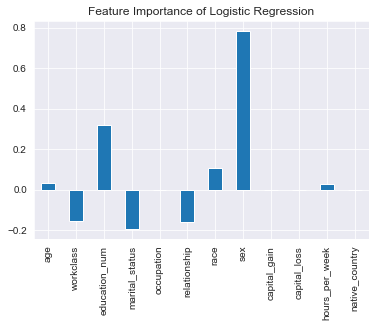

In [140]:
feature = pd.DataFrame(feature_dict , index=[0])

feature.T.plot.bar(title='Feature Importance of Logistic Regression', legend = False)

### Predict


In [141]:
x.columns

Index(['age', 'workclass', 'education_num', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week', 'native_country'],
      dtype='object')

In [142]:
def predict_50K(age, workclass, education_num , marital_status, occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country):
    X= np.zeros(len(x.columns))

    X[0] = age
    X[1] = workclass
    X[2] = education_num
    X[3] = marital_status
    X[4] = occupation
    X[5] = relationship
    X[6] = race
    X[7] = sex
    X[8] = capital_gain
    X[9] = capital_loss
    X[10] = hours_per_week
    X[11] = native_country

    return grid.predict([X])[0]

In [143]:
print(predict_50K(50,2,15,1,2,2,2,1,0,0,36,22))

1


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

